Loading existing data from data\SE01_daily_avg_temp_2024.csv
Loading existing data from data\SE02_daily_avg_temp_2024.csv
Loading existing data from data\SE03_daily_avg_temp_2024.csv
Loading existing data from data\SE04_daily_avg_temp_2024.csv


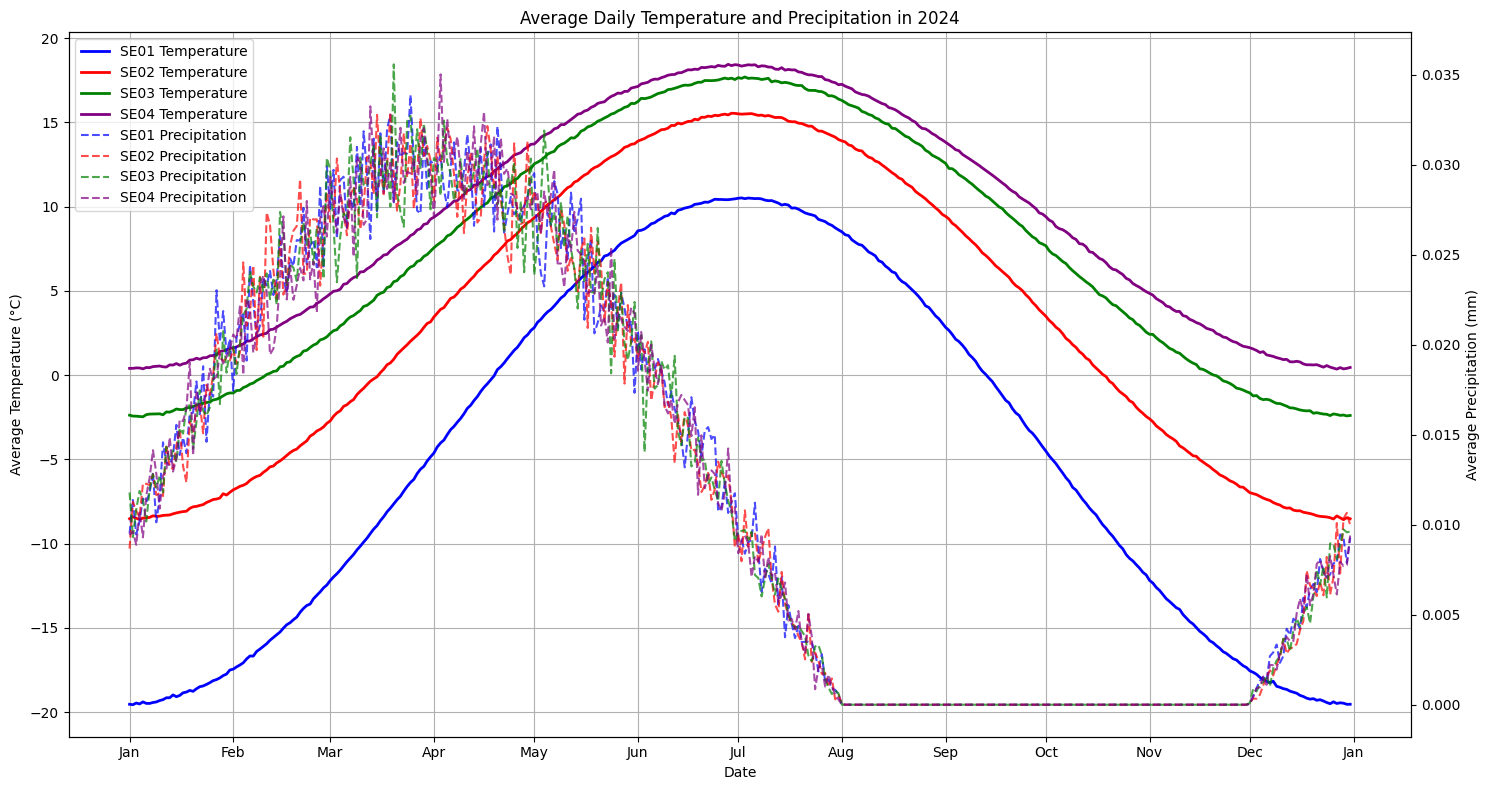

In [3]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from app.api_client import get_station_metadata, get_station_measurements
from app.util import get_data_year
from datetime import datetime
import time

station_data = {}


for i in [1,2,3,4]:
    station_id = f"SE0{i}"
    station_data[station_id] = get_data_year(station_id, 2024)


fig, ax1 = plt.subplots(figsize=(15, 8))

# Colors for different stations
colors = ['blue', 'red', 'green', 'purple']

# Plot temperature data on the primary y-axis
for idx, (station_id, df) in enumerate(station_data.items()):
    ax1.plot(df['date'], df['avg_temperature'], '-', 
             color=colors[idx], linewidth=2, label=f"{station_id} Temperature")

# Configure primary y-axis (temperature)
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Temperature (°C)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True)

# Create secondary y-axis for precipitation
ax2 = ax1.twinx()

# Plot precipitation data on the secondary y-axis
for idx, (station_id, df) in enumerate(station_data.items()):
    ax2.plot(df['date'], df['avg_precipitation'], '--', 
             color=colors[idx], alpha=0.7, linewidth=1.5, label=f"{station_id} Precipitation")

# Configure secondary y-axis (precipitation)
ax2.set_ylabel('Average Precipitation (mm)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Format x-axis to show month names
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax1.xaxis.set_major_locator(mdates.MonthLocator())

# Add title and legend
plt.title('Average Daily Temperature and Precipitation in 2024')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()